In [4]:
# Import libraries here
import warnings

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.simplefilter(action="ignore", category=FutureWarning)        

In [52]:
def wrangle(filepath):
     # Read CSV file into Dataframe
    df_dt = pd.read_csv(filepath)
    
    # Drop features with high null counts
    df_dt.drop(columns=["Curb Cut", "Horizontal Enlrgmt", "Vertical Enlrgmt"], inplace=True)
    
    # Remove NAN Value
    df_dt.dropna(inplace=True)
    
    # Transform 'Initial Cost from object to float
    df_dt['Initial Cost'] = df_dt['Initial Cost'].apply(lambda x: float(x.replace('$','').replace(',','')))
    
    
    return df_dt

In [53]:
df_dt = wrangle(r"C:\Users\sanus\Desktop\DS\web\apartment_cost_list.csv")
print(df_dt.info())
df_dt.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14823 entries, 1 to 19610
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Job #                   14823 non-null  int64  
 1   Borough                 14823 non-null  object 
 2   House #                 14823 non-null  object 
 3   Street Name             14823 non-null  object 
 4   Block                   14823 non-null  int64  
 5   Lot                     14823 non-null  int64  
 6   Bin #                   14823 non-null  int64  
 7   Job Type                14823 non-null  object 
 8   Community - Board       14823 non-null  int64  
 9   Fully Permitted         14823 non-null  object 
 10  Initial Cost            14823 non-null  float64
 11  Proposed Zoning Sqft    14823 non-null  int64  
 12  Enlargement SQ Footage  14823 non-null  int64  
 13  Zoning Dist1            14823 non-null  object 
 14  Job Description         14823 non-null

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Enlargement SQ Footage,Zoning Dist1,Job Description
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,07/14/2020,85000.0,0,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,05/23/2007,60000.0,0,0,R6,Change existing four story and basement brick ...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,09/29/2006,40000.0,0,0,C4-3,New C of O for existing building. New duplex a...


In [54]:
df_dt.describe()["Proposed Zoning Sqft"]

count     14823.000000
mean        510.235985
std        9480.088766
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      724475.000000
Name: Proposed Zoning Sqft, dtype: float64

In [55]:
df_dt.shape

(14823, 15)

In [56]:
# Check your work
assert (
    len(df_dt) <= 14823
), f"`df` should have no more than 1781 observations, not {len(df_dt)}."

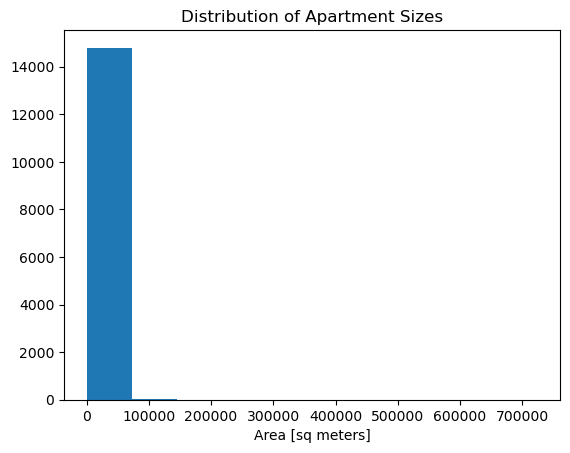

In [57]:
# Histogram
plt.hist(df_dt["Proposed Zoning Sqft"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

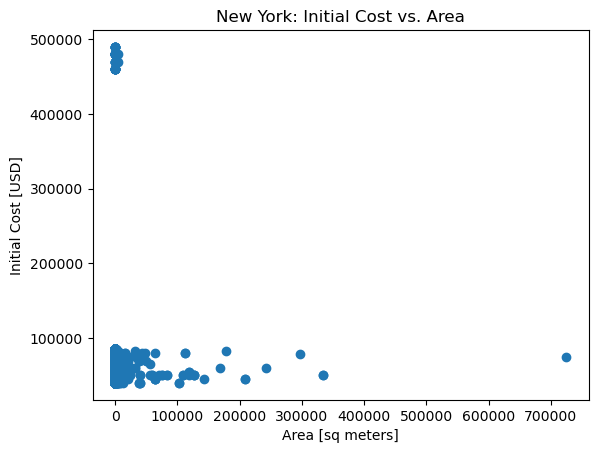

In [59]:
plt.scatter(x=df_dt["Proposed Zoning Sqft"], y=df_dt["Initial Cost"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Initial Cost [USD]")
plt.title("New York: Initial Cost vs. Area");

In [61]:
features = ["Proposed Zoning Sqft"]
X_train = df_dt[features]

In [62]:
X_train.shape

(14823, 1)

In [63]:
# Check your work
assert X_train.shape == (
    14823,
    1,
), f"The shape of `X_train` should be (1343, 1), not {X_train.shape}."

In [65]:
target = "Initial Cost"
y_train = df_dt[target]

In [66]:
# Check your work
assert y_train.shape == (14823,)

In [67]:
y_mean = y_train.mean()
y_mean

59641.907845915135

In [68]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[59641.907845915135,
 59641.907845915135,
 59641.907845915135,
 59641.907845915135,
 59641.907845915135]

In [69]:
y_pred_baseline =  [y_mean] * len(y_train)
len(y_pred_baseline) == len(y_train)

True

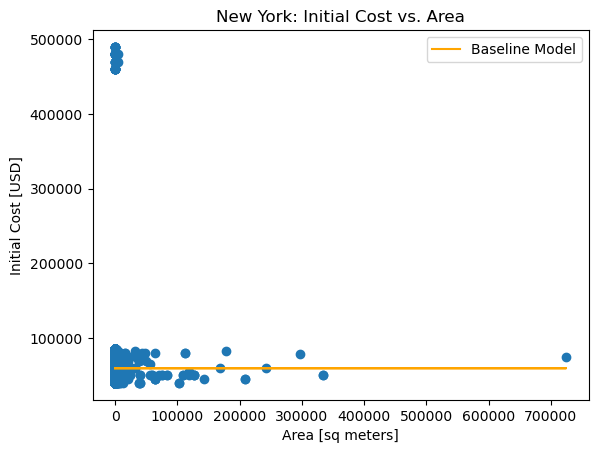

In [70]:
plt.plot(X_train.values, y_pred_baseline, color="orange", label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Initial Cost [USD]")
plt.title("New York: Initial Cost vs. Area")
plt.legend();

In [72]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean Initial Cost:", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Initial Cost: 59641.91
Baseline MAE: 13246.89


# Iterate

In [73]:
model = LinearRegression()

In [74]:
# Check your work
assert isinstance(model, LinearRegression)

In [75]:
model.fit(X_train, y_train)

LinearRegression()

In [76]:
check_is_fitted(model)

# Evaluate

In [77]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([59642.30989279, 59642.30989279, 59642.30989279, 59642.30989279,
       59642.30989279])

In [80]:
# Check your work
assert (
    len(y_pred_training) == 14823
), f"There should be 1343 predictions in `y_pred_training`, not {len(y_pred_training)}."

In [81]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 13246.86


# Communicate Results

In [82]:
intercept = round(model.intercept_, 2)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 59642.31


In [83]:
coefficient = round(model.coef_[0], 2)
print('Model coefficient for "Proposed Zoning Sqft":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "Proposed Zoning Sqft": -0.0


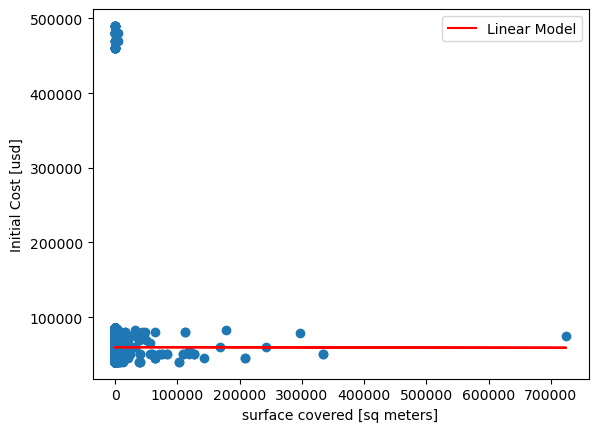

In [84]:
plt.plot(X_train.values, model.predict(X_train), color="r", label="Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("Initial Cost [usd]")
plt.legend();